This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

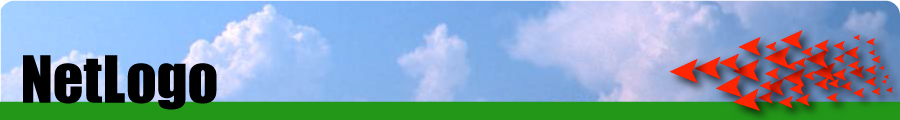

In [18]:
from IPython.core.display import Image
Image('https://ccl.northwestern.edu/netlogo/images/netlogo-title-wide-60.jpg')

In [19]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [ ]:
# We start by reading in the file generated by Netlogo's behaviorspace.
myDataframe = pd.read_csv('Wolf Sheep Predation experiment-table.csv',skiprows=6)

In [ ]:
# Let's see what kind of data we have. First provide a high level summary
myDataframe.info()

In [ ]:
# Ok, let's see what it looks like. Display the first 5 rows
myDataframe[:5]

In [ ]:
# Which columns do we have?
list(myDataframe.columns) 

In [ ]:
# Rename two column names
myDataframe.rename(columns={'[run number]':'run_number','[step]':'tick'}, inplace=True)
myDataframe[:5]

In [ ]:
# Ok, now let's start with some basic analysis of the data

# What was the highest amount of sheep encountered for all runs
myDataframe['count sheep'].max()

In [ ]:
# and the smallest number of sheep that we started a run with?
myDataframe['initial-number-sheep'].min()

In [ ]:
# Plot a sorted vector of the number of sheep over all time for all the simulations. 
# This gives you an idea of how often you encounter high, low, medium values
myDataframe['count sheep'].sort_values().plot(use_index=False,figsize=(15,8))

In [ ]:
# Next, let's draw a quick scatterplot
myDataframe.plot.scatter(x='tick',y='count sheep',figsize=(15,8))


In [ ]:
# Something’s going on.
# Let's see if we can figure out what by distinguishing between the different runs
# We do this by coloring the dots by run Number (option c='run_number' below)
myDataframe.plot.scatter(x='tick',y='count sheep',c='run_number',colormap='viridis',figsize=(20,10))

In [ ]:
# Let's make another scatterplot, now let's look at grass vs sheep
myDataframe.plot.scatter(x='grass',y='count sheep',figsize=(20,10))

In [ ]:
myDataframe.plot.scatter(x='grass',y='count sheep',c='run_number',colormap='plasma',figsize=(20,10))

In [ ]:
# Let's look at individual runs 
sns.FacetGrid(myDataframe, col='run_number', col_wrap=5).map(plt.plot,
                                                             'tick','count sheep')


In [ ]:
# Ok, now, let's see boxplots for the grass, number of sheep and number of wolfs for each run 
myDataframe.groupby(myDataframe['run_number']).boxplot(column=['grass','count sheep','count wolves'],figsize=(40,40))

In [ ]:
# Finally, let's try a 3d plot 
td = plt.figure(figsize=(20,20)).gca(projection='3d')
td.scatter(myDataframe['tick'],myDataframe['count sheep'], myDataframe['count wolves'])
td.view_init(30,140)
td.set_xlabel('ticks')
td.set_ylabel('sheep')
td.set_zlabel('wolves')